w[0]: 0.393906  b: -0.031804


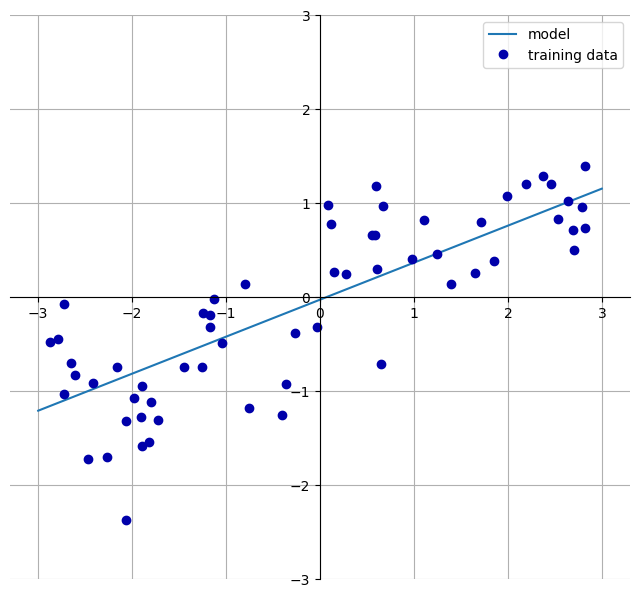

In [6]:
import mglearn
mglearn.plots.plot_linear_regression_wave()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X,y=mglearn.datasets.make_wave(n_samples=60)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)
RL=LinearRegression().fit(X_train,y_train)
#paramentri panta w sunt numiti coeficienti si sunt retinuti in atributul coef_ cat timp deplasarea e retinuta in intercept_
print("RL.coef_:{}".format(RL.coef_))
print("RL.intercept_:{}".format(RL.intercept_))

RL.coef_:[0.39390555]
RL.intercept_:-0.031804343026759746


In [12]:
#perofrmantele pe multimea de antrenare si performante de test
print('training set score :{:.2f}'.format(RL.score(X_train,y_train)))
print("test set score: {:.2f}".format(RL.score(X_test,y_test)))

training set score :0.67
test set score: 0.66


In [14]:
X,y=mglearn.datasets.load_extended_boston()
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
RL=LinearRegression().fit(X_train,y_train)
print('training set score :{:.2f}'.format(RL.score(X_train,y_train)))
print("test set score: {:.2f}".format(RL.score(X_test,y_test)))

training set score :0.95
test set score: 0.61


In [20]:
from sklearn.linear_model import Ridge
ridge=Ridge().fit(X_train,y_train)
print("trainig set score :{:.2f}".format(ridge.score(X_train,y_train)))
print("test set score: {:.2f}".format(ridge.score(X_test,y_test)))

trainig set score :0.89
test set score: 0.75


In [65]:
ridge10=Ridge(alpha=10).fit(X_train,y_train)
print("training set score: {:.2f}".format(ridge10.score(X_train,y_train)))
print("test set score: {:.2f}".format(ridge10.score(X_test,y_test)))

training set score: 0.79
test set score: 0.64


In [62]:
ridge01=Ridge(alpha=0.1).fit(X_train,y_train)
print("training set score: {:.2f}".format(ridge01.score(X_train,y_train)))
print("test set score: {:.2f}".format(ridge01.score(X_test,y_test)))

training set score: 0.93
test set score: 0.77


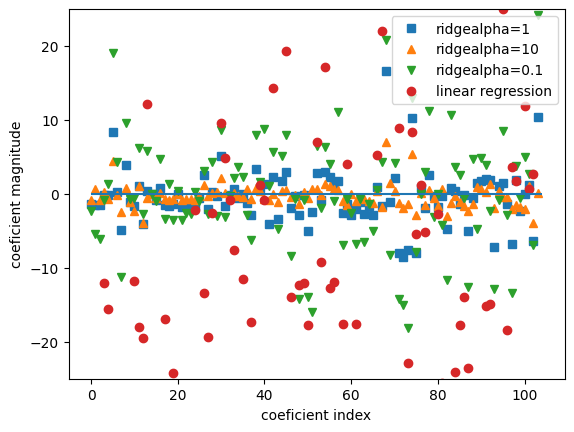

In [69]:
#PLOT pe seturi
import matplotlib.pyplot as plt
plt.plot(ridge.coef_,'s',label='ridgealpha=1')
plt.plot(ridge10.coef_,'^',label='ridgealpha=10')
plt.plot(ridge01.coef_,'v',label='ridgealpha=0.1')
plt.plot(RL.coef_,'o',label='linear regression')
plt.xlabel("coeficient index")
plt.ylabel("coeficient magnitude")
plt.hlines(0,0,len(RL.coef_))
plt.ylim(-25,25)
plt.legend()


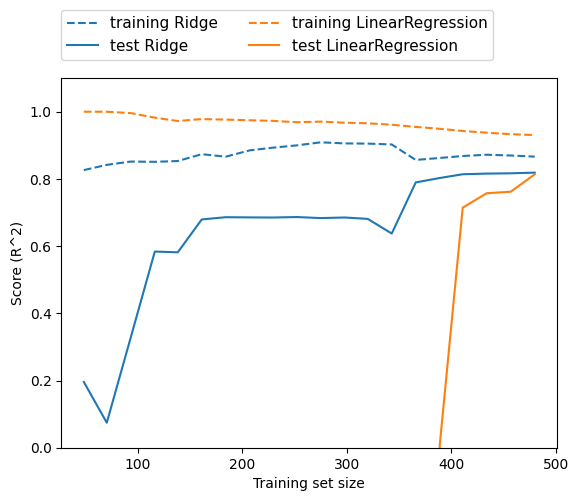

In [72]:
mglearn.plots.plot_ridge_n_samples()

In [100]:
#tip alternativ la regressia ridge(lasso)
from sklearn.linear_model import Lasso
import numpy as np
lasso=Lasso().fit(X_train,y_train)
print("training set score: {:.2f}".format(lasso.score(X_train,y_train)))
print("test set score: {:.2f}".format(lasso.score(X_test,y_test)))
print("number of features used: {}".format(np.sum(lasso.coef_ != 0)))

training set score: 0.29
test set score: 0.21
number of features used: 4


In [106]:
#crestem setarea implicita a lui max_iter altfel modelul ne-ar putea avertiza ca ar trebui sa crestem max_iter
lasso001=Lasso(alpha=0.01,max_iter=100000).fit(X_train,y_train)
print("training set score: {:.2f}".format(lasso001.score(X_train,y_train)))
print("test set score: {:.2f}".format(lasso001.score(X_test,y_test)))
print("number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

training set score: 0.90
test set score: 0.77
number of features used: 33


In [125]:
#crestem setarea implicita a lui max_iter altfel modelul ne-ar putea avertiza ca ar trebui sa crestem max_iter
lasso0001=Lasso(alpha=0.0001,max_iter=100000).fit(X_train,y_train)
print("training set score: {:.2f}".format(lasso0001.score(X_train,y_train)))
print("test set score: {:.2f}".format(lasso0001.score(X_test,y_test)))
print("number of features used: {}".format(np.sum(lasso0001.coef_ != 0)))

training set score: 0.95
test set score: 0.64
number of features used: 96


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


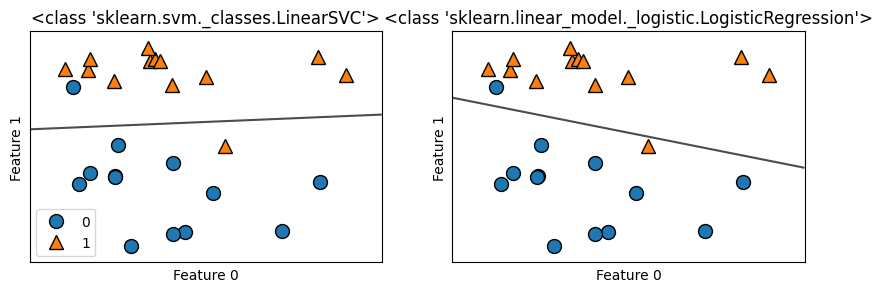

In [127]:
#clasificare binara
#Logistical regression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
X,y=mglearn.datasets.make_forge()
fig,axes=plt.subplots(1,2,figsize=(10,3))
for model,ax in zip([LinearSVC(),LogisticRegression()],axes):
  clf=model.fit(X,y)
  mglearn.plots.plot_2d_separator(clf,X,fill=False,eps=0.5,ax=ax,alpha=.7)
  mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
  ax.set_title("{}".format(clf.__class__,__name__))
  ax.set_xlabel("Feature 0")
  ax.set_ylabel("Feature 1")

axes[0].legend()

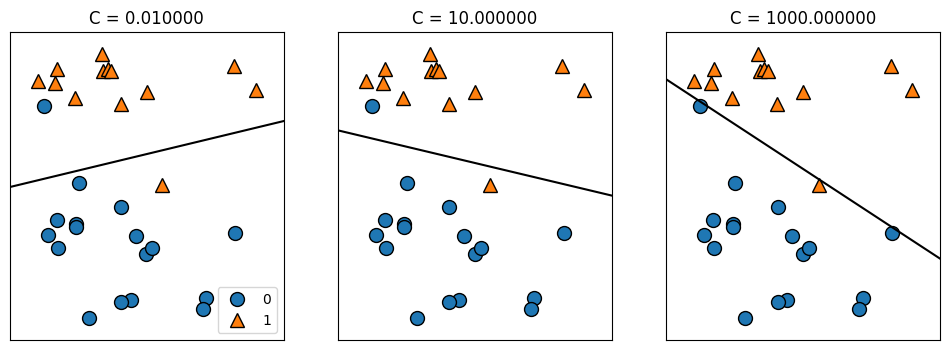

In [128]:
mglearn.plots.plot_linear_svc_regularization()

In [146]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=42)
logreg=LogisticRegression(max_iter=10000).fit(X_train,y_train)
print("training set score: {:.3f}".format(logreg.score(X_train,y_train)))
print("test set score: {:.3f}".format(logreg.score(X_test,y_test)))

training set score: 0.958
test set score: 0.958


In [170]:
#parametrul C din logistic
#IN ACEST CAZ C=725 DA CELE MAI BUNE REZULTATE
logreg100=LogisticRegression(C=100,max_iter=10000).fit(X_train,y_train)
print("training set score: {:.3f}".format(logreg100.score(X_train,y_train)))
print("test set score: {:.3f}".format(logreg100.score(X_test,y_test)))

training set score: 0.981
test set score: 0.965


In [164]:
logreg001=LogisticRegression(C=0.01,max_iter=10000).fit(X_train,y_train)
print("training set score: {:.3f}".format(logreg001.score(X_train,y_train)))
print("test set score: {:.3f}".format(logreg001.score(X_test,y_test)))

training set score: 0.953
test set score: 0.951


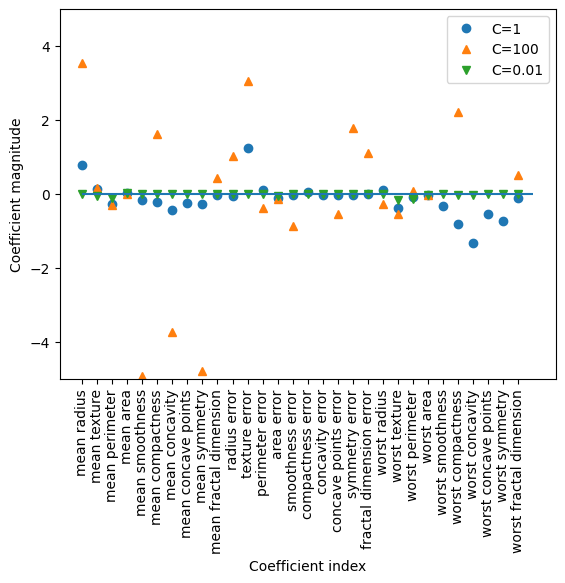

In [171]:
plt.plot(logreg.coef_.T,'o',label='C=1')
plt.plot(logreg100.coef_.T,'^',label='C=100')
plt.plot(logreg001.coef_.T,'v',label='C=0.01')
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90)
plt.hlines(0,0,cancer.data.shape[1])
plt.ylim(-5,5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()